In [3]:
import zipfile
with zipfile.ZipFile('/content/number_plate.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
import os

# Define the paths to the extracted directories
images_path = '/content/number_plate/extracted_number_plate/images'
annotations_path = '/content/number_plate/extracted_number_plate/images'

# List files in each directory and print them
def list_files_in_directory(path):
    """Lists and prints files within a specified directory."""
    if os.path.exists(path):
        files = os.listdir(path)
        print(f"Files in '{path}':")
        for file in files:
            print(f"- {file}")
    else:
        print(f"Error: Directory '{path}' not found.")

# List files in both directories
list_files_in_directory(images_path)
list_files_in_directory(annotations_path)

Files in '/content/number_plate/extracted_number_plate/images':
- Cars132.png
- Cars178.png
- Cars276.png
- Cars309.png
- Cars52.png
- Cars0.png
- Cars342.png
- Cars275.png
- Cars141.png
- Cars55.png
- Cars310.png
- Cars85.png
- Cars302.png
- Cars395.png
- Cars10.png
- Cars140.png
- Cars177.png
- Cars232.png
- Cars223.png
- Cars364.png
- Cars373.png
- Cars324.png
- Cars384.png
- Cars181.png
- Cars204.png
- Cars403.png
- Cars265.png
- Cars269.png
- Cars102.png
- Cars25.png
- Cars192.png
- Cars206.png
- Cars304.png
- Cars205.png
- Cars150.png
- Cars196.png
- Cars282.png
- Cars62.png
- Cars195.png
- Cars253.png
- Cars301.png
- Cars49.png
- Cars199.png
- Cars96.png
- Cars285.png
- Cars108.png
- Cars380.png
- Cars241.png
- Cars226.png
- Cars297.png
- Cars290.png
- Cars431.png
- Cars316.png
- Cars323.png
- Cars11.png
- Cars334.png
- Cars130.png
- Cars283.png
- Cars220.png
- Cars197.png
- Cars75.png
- Cars344.png
- Cars340.png
- Cars424.png
- Cars189.png
- Cars238.png
- Cars67.png
- Cars392.p

In [5]:
# Function to extract bounding box information from XML
def extract_bbox_from_xml(xml_file):
    """Extracts bounding box coordinates from an XML file."""
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        bboxes.append([xmin, ymin, xmax, ymax])
    return bboxes

# 1. Count the number of images and annotations
num_images = len(os.listdir(images_path))
num_annotations = len(os.listdir(annotations_path))
print(f"Number of images: {num_images}")
print(f"Number of annotations: {num_annotations}")

Number of images: 433
Number of annotations: 433


# CHECKING Validation of XML Annotation

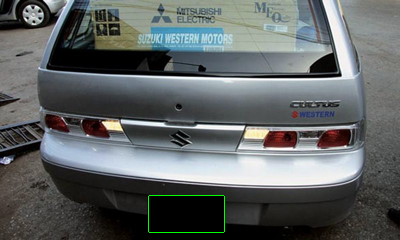

Checked Cars217.png: Number plate covered for privacy.


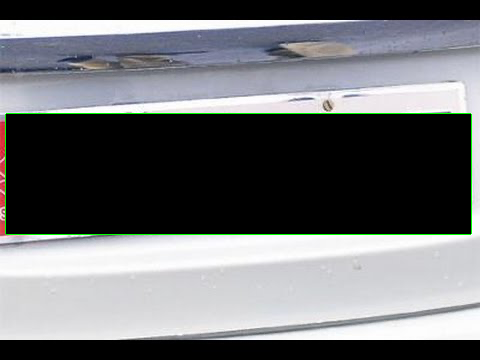

Checked Cars76.png: Number plate covered for privacy.


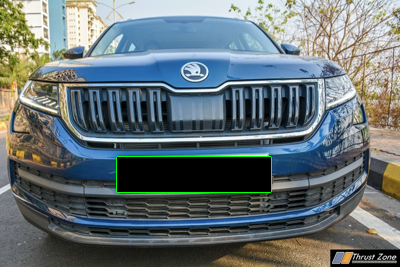

Checked Cars333.png: Number plate covered for privacy.


In [6]:
import cv2
import xml.etree.ElementTree as ET
import os
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Define paths to images and annotations
images_path = '/content/number_plate/extracted_number_plate/images'
annotations_path = '/content/number_plate/extracted_number_plate/annotations'

# Files to check
files_to_check = ['Cars217.png', 'Cars76.png', 'Cars333.png']  # Replace with actual filenames

# Function to parse XML and extract bounding box and text
def parse_annotation(xml_path):
    """Extracts bounding box coordinates and license plate text from XML."""
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.findall("object"):
            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text)
            ymin = int(bbox.find("ymin").text)
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)
            plate_text = obj.find("name").text.strip()
            return (xmin, ymin, xmax, ymax, plate_text)
    except Exception as e:
        print(f"Error parsing {xml_path}: {e}")
        return None

# Loop through files and check annotations
for img_file in files_to_check:
    image_path = os.path.join(images_path, img_file)
    xml_file = img_file.replace(".png", ".xml")
    xml_path = os.path.join(annotations_path, xml_file)

    if not os.path.exists(xml_path):
        print(f"Annotation file missing for {img_file}")
        continue

    # Parse the XML file
    result = parse_annotation(xml_path)
    if result:
        xmin, ymin, xmax, ymax, plate_text = result

        # Read the image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Could not read image {img_file}")
            continue

        # Draw the bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

        # Cover the number plate with a black box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 0), -1)  # Black filled rectangle

        # Show the image using cv2_imshow instead of cv2.imshow
        cv2_imshow(img)

        print(f"Checked {img_file}: Number plate covered for privacy.")
    else:
        print(f"Failed to parse annotation for {img_file}.")

# Checking content of some XML file

In [7]:
import xml.etree.ElementTree as ET
import os

# Paths to directories
images_path = '/content/number_plate/extracted_number_plate/images'
annotations_path = '/content/number_plate/extracted_number_plate/annotations'

# Image and XML file
image_file = 'Cars53.png'
xml_file = image_file.replace(".png", ".xml")

# Read XML annotation
xml_path = os.path.join(annotations_path, xml_file)
tree = ET.parse(xml_path)
root = tree.getroot()

# Print the raw XML content
print(ET.tostring(root, encoding='unicode'))  # Prints the XML content

# Extract specific information for verification
for obj in root.findall("object"):
    name_tag = obj.find("name")
    if name_tag is not None:
        print(f"License Plate Text: {name_tag.text}")  # Prints the license plate text

<annotation>
    <folder>images</folder>
    <filename>Cars53.png</filename>
    <size>
        <width>400</width>
        <height>288</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>chio OSE</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>146</xmin>
            <ymin>187</ymin>
            <xmax>260</xmax>
            <ymax>213</ymax>
        </bndbox>
    </object>
</annotation>
License Plate Text: chio OSE


In [9]:
!pip install pytesseract
!pip install rapidfuzz
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 823.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422

In [11]:
pip install rapidfuzz

In [10]:
!pip install easyocr

In [12]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,773 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [13]:
!sudo apt install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [14]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


Training with LR=0.005, Batch Size=2



Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 175MB/s]


Epoch 1, Train Loss: 0.1477, Val Loss: 0.1008
Best model updated and saved.


Epoch 2, Train Loss: 0.0868, Val Loss: 0.0855
Best model updated and saved.


Epoch 3, Train Loss: 0.0724, Val Loss: 0.0863


Epoch 4, Train Loss: 0.0622, Val Loss: 0.0839
Best model updated and saved.


Epoch 5, Train Loss: 0.0555, Val Loss: 0.0806
Best model updated and saved.


Epoch 6, Train Loss: 0.0503, Val Loss: 0.0876


Epoch 7, Train Loss: 0.0478, Val Loss: 0.0778
Best model updated and saved.


Epoch 8, Train Loss: 0.0440, Val Loss: 0.0844


Epoch 9, Train Loss: 0.0421, Val Loss: 0.0845


Epoch 10, Train Loss: 0.0403, Val Loss: 0.0834


Epoch 11, Train Loss: 0.0377, Val Loss: 0.0820


Epoch 12, Train Loss: 0.0375, Val Loss: 0.0847


Epoch 13, Train Loss: 0.0363, Val Loss: 0.0813


Epoch 14, Train Loss: 0.0345, Val Loss: 0.0809


Epoch 15, Train Loss: 0.0341, Val Loss: 0.0817


Epoch 16, Train Loss: 0.0325, Val Loss: 0.0832


Epoch 17, Train Loss: 0.0314, Val Loss: 0.0880


Epoch 18, Train Loss: 0.0306, Val Loss: 0.0802


Epoch 19, Train Loss: 0.0308, Val Loss: 0.0815


Epoch 20, Train Loss: 0.0292, Val Loss: 0.0848


Epoch 21, Train Loss: 0.0295, Val Loss: 0.0834


Epoch 22, Train Loss: 0.0291, Val Loss: 0.0826


Epoch 23, Train Loss: 0.0285, Val Loss: 0.0843


Epoch 24, Train Loss: 0.0280, Val Loss: 0.0829


Epoch 25, Train Loss: 0.0276, Val Loss: 0.0875


Epoch 26, Train Loss: 0.0287, Val Loss: 0.0816


Epoch 27, Train Loss: 0.0278, Val Loss: 0.0871


Epoch 28, Train Loss: 0.0265, Val Loss: 0.0838


Epoch 29, Train Loss: 0.0257, Val Loss: 0.0883


Epoch 30, Train Loss: 0.0258, Val Loss: 0.0842


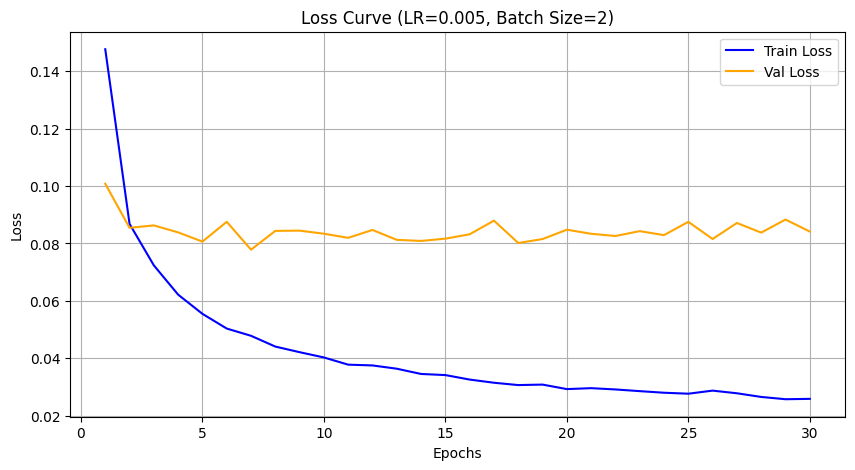


Training complete for all hyperparameter settings!
Best Model: LR=0.005, Batch Size=2, Best Validation Loss=0.0778


In [25]:
import zipfile
import os
import cv2
import xml.etree.ElementTree as ET
import pytesseract
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import easyocr
from rapidfuzz.distance import Levenshtein
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from tqdm import tqdm  # For progress bar

# Paths to directories
images_path = '/content/number_plate/extracted_number_plate/images'           # Update this path to your images directory
annotations_path = '/content/number_plate/extracted_number_plate/annotations'  # Update this path to your annotations directory

# Initialize OCR reader and Tesseract command
reader = easyocr.Reader(['en'], gpu=True)
pytesseract.pytesseract_cmd = r'/usr/bin/tesseract'

# Dataset Class
class LicensePlateDataset(Dataset):
    def __init__(self, images_path, annotations_path):
        self.images_path = images_path
        self.annotations_path = annotations_path
        self.image_files = [f for f in os.listdir(images_path) if f.endswith(".png")]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_file = self.image_files[idx]
        image_path = os.path.join(self.images_path, img_file)
        xml_file = img_file.replace(".png", ".xml")
        xml_path = os.path.join(self.annotations_path, xml_file)

        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found: {image_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = F.to_tensor(image)

        boxes, labels = [], []
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            for obj in root.findall("object"):
                bndbox = obj.find("bndbox")
                xmin, ymin, xmax, ymax = [int(bndbox.find(tag).text) for tag in ["xmin", "ymin", "xmax", "ymax"]]
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(1)  # Assuming class 1 for plates
        except FileNotFoundError:
            pass  # Image may not have any valid annotations

        target = {
            "boxes": torch.as_tensor(boxes, dtype=torch.float32),
            "labels": torch.as_tensor(labels, dtype=torch.int64)
        }
        return image, target

# Custom collate function
def collate_fn(batch):
    return tuple(zip(*batch))

# Training hyperparameter
hyperparam = [
    {'lr': 0.005, 'batch_size': 2},
]

# Prepare dataset
dataset = LicensePlateDataset(images_path, annotations_path)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Store all losses for comparison
all_train_losses = []
all_val_losses = []
best_val_loss = float('inf')
best_model_state = None
best_hyperparams = None

for params in hyperparam:
    lr, batch_size = params['lr'], params['batch_size']
    print(f"\nTraining with LR={lr}, Batch Size={batch_size}\n")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    model = fasterrcnn_resnet50_fpn(weights="DEFAULT")  # Use the default weights
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.0005)
    num_epochs = 30
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        # Training loop with tqdm progress bar
        for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            optimizer.zero_grad()
            loss_dict = model(images, targets)

            # Compute total loss
            loss = sum(loss for loss in loss_dict.values())
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation Step
        model.eval()
        val_loss = 0
        valid_batches = 0  # Track valid batches

        with torch.no_grad():
            for images, targets in val_loader:
                images = [img.to(device) for img in images]
                targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

                # If all targets are empty, skip the batch
                if all(len(t["boxes"]) == 0 for t in targets):
                    continue

                # Force model to return loss in eval mode
                model.train()  # Temporarily switch back to training mode
                loss_dict = model(images, targets)
                loss = sum(loss for loss in loss_dict.values())
                model.eval()  # Switch back to evaluation mode

                val_loss += loss.item()
                valid_batches += 1  # Count only valid batches

        avg_val_loss = val_loss / valid_batches if valid_batches > 0 else 0
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Save the best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict()
            best_hyperparams = params
            torch.save(best_model_state, "best_faster_rcnn.pth")
            print("Best model updated and saved.")

    # Store the losses for the current hyperparameter setting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

    # Plot losses for this hyperparameter setting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve (LR={lr}, Batch Size={batch_size})')
    plt.legend()
    plt.grid()
    plt.show()

print("\nTraining complete for all hyperparameter settings!")
print(f"Best Model: LR={best_hyperparams['lr']}, Batch Size={best_hyperparams['batch_size']}, Best Validation Loss={best_val_loss:.4f}")


In [16]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.9 MB/s eta 0:00:00


Total images processed: 433, Detected Plates: 408
Mean OCR Accuracy (excluding undetected images): 31.79%
         Image Detected Plate Ground Truth  Accuracy (%)
0  Cars374.png          57JD1        ST Jo          0.00
1  Cars287.png     1DL7CN5617  @L7C N 5617         63.64
2  Cars331.png       HRE0CB11  MR 20.Ce 19         36.36
3  Cars200.png     KA03AB3380     KA 03 AB         40.00
4  Cars409.png      RRK49TTAR      RK9774]         33.33


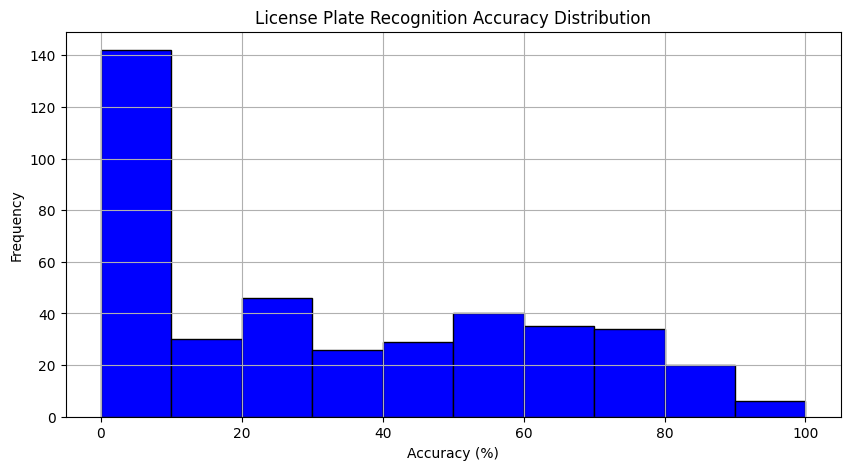

In [30]:
import os
import cv2
import xml.etree.ElementTree as ET
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import easyocr
import torchvision.transforms.functional as F
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import Levenshtein
import re

# Initialize EasyOCR reader
reader = easyocr.Reader(["en"])

# Define paths
images_path = "/content/number_plate/extracted_number_plate/images"  # Update with the correct path
annotations_path = "/content/number_plate/extracted_number_plate/annotations"  # Update with the correct path

# Load the best model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
model.load_state_dict(torch.load("best_faster_rcnn.pth", map_location=device))
model.to(device)
model.eval()

# Function to preprocess images for OCR
def preprocess_image(image):
    if image.size == 0:
        return image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=3.5, fy=3.5, interpolation=cv2.INTER_CUBIC)
    _, binary_inv = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 8)
    processed = cv2.bitwise_or(binary_inv, adaptive_thresh)
    kernel = np.ones((3, 3), np.uint8)
    return cv2.morphologyEx(processed, cv2.MORPH_CLOSE, kernel)

# Function to clean OCR output
def clean_ocr_text(text):
    text = re.sub(r'[^A-Z0-9]', '', text)
    return text.replace("O", "0").replace("I", "1").replace("Z", "2").strip()

# Function to extract text from license plate
def extract_plate_text(processed_plate):
    results = reader.readtext(processed_plate, detail=0, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    return clean_ocr_text("".join(results)) if results else ""

# Perform inference and evaluate OCR results
results_list = []
detected_count = 0

model.eval()
for img_file in os.listdir(images_path):
    if img_file.endswith(".png"):
        image_path = os.path.join(images_path, img_file)
        xml_file = img_file.replace(".png", ".xml")
        xml_path = os.path.join(annotations_path, xml_file)

        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            actual_text = ' '.join([obj.find("name").text.strip() for obj in root.findall("object") if obj.find("name") is not None])
            if not actual_text:
                continue
        except Exception as e:
            print(f"Error parsing XML file {xml_path}: {e}")
            continue

        img = cv2.imread(image_path)
        img_tensor = F.to_tensor(img).unsqueeze(0).to(device)
        outputs = model(img_tensor)[0]

        detected_texts = []
        for box in outputs["boxes"]:
            x_min, y_min, x_max, y_max = map(int, box.tolist())
            license_plate = img[y_min:y_max, x_min:x_max]
            processed_plate = preprocess_image(license_plate)
            detected_text = extract_plate_text(processed_plate)
            if detected_text:
                detected_texts.append(detected_text)

        if detected_texts:
            license_plate_text = detected_texts[0]  # Take first detected text
            levenshtein_distance = Levenshtein.distance(actual_text, license_plate_text)
            accuracy = max(0, 100 - (levenshtein_distance / max(len(actual_text), len(license_plate_text)) * 100))
            results_list.append({
                "Image": img_file,
                "Detected Plate": license_plate_text,
                "Ground Truth": actual_text,
                "Accuracy (%)": round(accuracy, 2)
            })
            detected_count += 1

# Convert results to DataFrame and Save
results_df = pd.DataFrame(results_list)
results_df.to_csv('license_plate_recognition_results.csv', index=False)

# Print results
mean_accuracy = results_df["Accuracy (%)"].mean() if not results_df.empty else 0
print(f"Total images processed: {len(os.listdir(images_path))}, Detected Plates: {detected_count}")
print(f"Mean OCR Accuracy (excluding undetected images): {round(mean_accuracy, 2)}%")
print(results_df.head())

# Plot accuracy distribution
plt.figure(figsize=(10, 5))
plt.hist(results_df["Accuracy (%)"], bins=10, color='blue', edgecolor='black')
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")
plt.title("License Plate Recognition Accuracy Distribution")
plt.grid()
plt.show()
